# Visualização de Dados com t-SNE

## Introdução

O **t-SNE (t-Distributed Stochastic Neighbor Embedding)** é uma técnica de redução de dimensionalidade que preserva relações locais, ideal para visualização de dados complexos em 2D ou 3D.

Neste exemplo, aplicaremos o t-SNE ao dataset **MNIST**, que contém imagens de dígitos manuscritos (0 a 9). Vamos projetar os dados em 2D para observar agrupamentos visuais.

## Parâmetros Importantes

1. **`n_components`**:
   - Número de dimensões do espaço reduzido (geralmente 2 ou 3).

2. **`perplexity`**:
   - Controla o equilíbrio entre proximidade local e global.
   - Valores típicos: $5$ a $50$.

3. **`learning_rate`**:
   - Controla a taxa de ajuste durante a otimização.
   - Valores típicos: $10$ a $1000$.

4. **`n_iter`**:
   - Número de iterações para ajustar as posições no espaço reduzido.

### Dataset

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.datasets import fetch_openml

# Carregar o dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Amostrar para reduzir o tempo de execução
sample_size = 0200
X_sample, y_sample = X[:sample_size], y[:sample_size]

# Criar um DataFrame com as amostras e a coluna de rótulos
mnist_dataframe = pd.concat([pd.DataFrame(X_sample), pd.Series(y_sample, name='Target')], axis=1)

# Mostrar as primeiras amostras do dataset
print(mnist_dataframe.head())



C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  Target  
0       0.0       0.

In [3]:
# Importar bibliotecas e pre-processar os dados
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)


### **2. Aplicar o t-SNE**

Aqui, configuramos o t-SNE para projetar os dados em 2D:

- **`n_components=2`**: Reduz os dados para 2 dimensões.
- **`perplexity=30`**: Define a largura da vizinhança.
- **`random_state=42`**: Garante reprodutibilidade.
- **`n_iter=1000`**: Ajusta as posições dos pontos em até 1000 iterações.


In [4]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)


### **3. Visualizar os Dados Projetados**

Usamos a projeção em 2D para observar como os dados foram organizados pelo t-SNE. Cada ponto é colorido de acordo com sua classe (0 a 9).


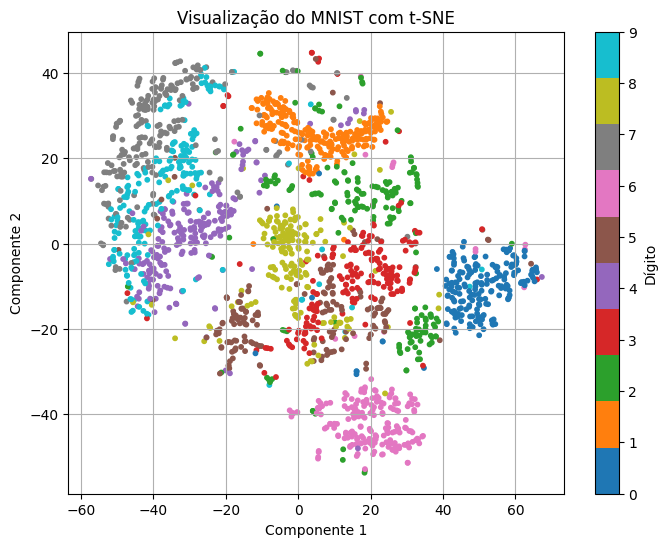

In [6]:
# Plotar os dados reduzidos pelo t-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample.astype(int), cmap='tab10', s=10)
plt.colorbar(scatter, label="Dígito")
plt.title("Visualização do MNIST com t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()


### **4. Análise dos Resultados**

1. **Clusters Visíveis**:
   - Cada grupo representa um conjunto de dígitos semelhantes.
   - Os dígitos mais distintos (como 1 e 7) formam clusters mais separados.

2. **Sobreposição**:
   - Alguns dígitos, como 4 e 9, podem se sobrepor devido à semelhança visual.

3. **Vantagens do t-SNE**:
   - Projeção de alta qualidade para análise exploratória.
   - Identificação visual de padrões e agrupamentos.

---

## Conclusão

O t-SNE é uma técnica poderosa para visualizar dados complexos. Embora não seja um algoritmo de clusterização, ele ajuda a revelar agrupamentos naturais nos dados. No caso do MNIST, conseguimos observar como os dígitos são organizados em um espaço de menor dimensão.
